In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

from dynasaur.plugins.data_visualization_controller import DataVisualizationController
from dynasaur.plugins.criteria_controller import CriteriaController


In [13]:
#Auxilaries - where are your definition files located?
input_dir = os.path.join(os.getcwd(),"Auxilaries")
path_to_def = os.path.join(input_dir, "Calculation_procedures.def")
path_to_def_id = os.path.join(input_dir, "Objects.def")

#Simulation Results - which simulation do you want to analyse?
path_to_data = os.path.join(os.getcwd(),"01_Shell/3IP")
outputfiles = os.path.join(path_to_data,"binout*")

data_vis_controller = DataVisualizationController(calculation_procedure_def_file=path_to_def,
                                                  object_def_file=path_to_def_id,
                                                  data_source=outputfiles)

#Output Directory - where should resuls from analysis be stored?
output_dir = os.path.join(path_to_data,"Output")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)



[READ DYNASAUR DEF]	read C:\FE_Simulations\Elemnt-type\Auxilaries\Calculation_procedures.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read C:\FE_Simulations\Elemnt-type\Auxilaries\Objects.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!


In [14]:
#load reference data
path_to_1IP_data=os.path.join(os.getcwd(),"01_Shell/1IP")
path_to_1IP_data=os.path.join(os.getcwd(),"01_Shell/3IP")
#Reference_data = np.genfromtxt(os.path.join(path_to_ref_data,"EN_AW-5083_stress_strain_curves_converted.csv"),delimiter=';')
#Reference_data = np.genfromtxt(os.path.join(path_to_ref_data,"EN AW-5083_stress_strain_curves_raw_data.xlsx"),delimiter=';')
#strain_ref=Reference_data[:,0]
#stress_ref=Reference_data[:,1] 

#print ()
#print ()

In [17]:
commands = [
            {'visualization': "SHEET_Disp_z", 'x_label': 'Time[ms]', 'y_label': 'Displacement [mm]'},
            {'visualization': "MODEL_Timestep", 'x_label': 'Time[ms]', 'y_label': 'timestep [ms]'},
            {'visualization': "MODEL_Internal_Energy", 'x_label': 'Time[ms]', 'y_label': 'internal energy []'},
            {'visualization': "MODEL_Kinetic_Energy", 'x_label': 'Time[ms]', 'y_label': 'hourglass energy []'},
            {'visualization': "MODEL_Total_Energy", 'x_label': 'Time[ms]', 'y_label': 'total energy []'},
            ]
for command in commands:
    data_vis_controller.calculate(command)
    

[CALCULATION]	Calculating Visualization: SHEET_Disp_z
[DATA]	read id 6 from channel name: z_displacement
[CALCULATION]	Calculating Visualization: MODEL_Timestep
[DATA]	ENERGY_GLOBAL read from channel name: time_step
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy


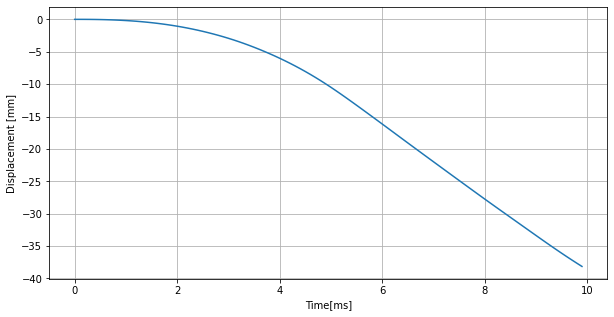

In [22]:
Time = data_vis_controller.get_data('SHEET', 'Disp_z')['X']
x_label = data_vis_controller.get_data('SHEET', 'Disp_z')['x_name']

Displacement = data_vis_controller.get_data('SHEET', 'Disp_z')['Y']
y_label = data_vis_controller.get_data('SHEET', 'Disp_z')['y_name']

plt.figure(figsize=(10,5))
plt.plot(Time, Displacement)
#plt.plot(strain_ref, stress_ref)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

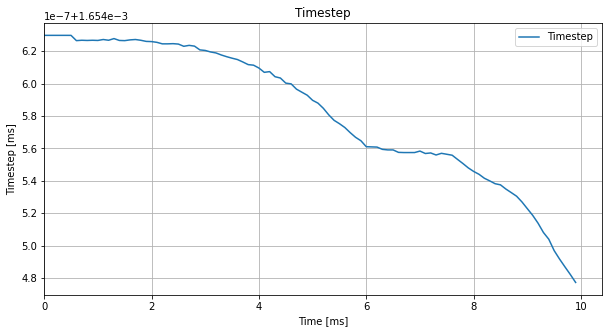

In [23]:
time = data_vis_controller.get_data("MODEL","Timestep")["X"]
Timestep = data_vis_controller.get_data("MODEL","Timestep")["Y"]


fig5, ax = plt.subplots(figsize=(10,5))# a figure with a single Axes
ax.plot(time, Timestep, label="Timestep")


ax.set(xlabel='Time [ms]',ylabel='Timestep [ms]', title='Timestep', xlim=0)
ax.grid()
ax.legend()
plt.show()

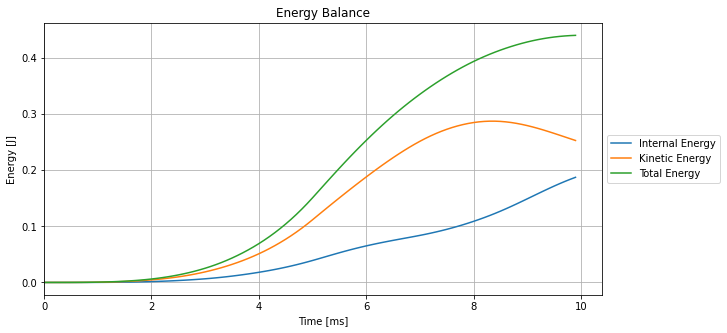

In [30]:
time = data_vis_controller.get_data("MODEL","Internal_Energy")["X"]
#hourglass_energy = data_vis_controller.get_data("MODEL","Hourglass_Energy")["Y"]
internal_energy = data_vis_controller.get_data("MODEL","Internal_Energy")["Y"]
kinetic_energy=data_vis_controller.get_data("MODEL","Kinetic_Energy")["Y"]
total_energy=data_vis_controller.get_data("MODEL","Total_Energy")["Y"]
#sliding_interface_energy=data_vis_controller.get_data("MODEL","Sliding_Interface_Energy")["Y"]
#system_damping_energy=data_vis_controller.get_data("MODEL","System_Damping_Energy")["Y"]

fig1, ax = plt.subplots(figsize=(10,5))# a figure with a single Axes
ax.plot(time, internal_energy, label="Internal Energy")
#ax.plot(time, hourglass_energy, label="Hourglass Energy")
ax.plot(time, kinetic_energy, label="Kinetic Energy")
ax.plot(time, total_energy, label="Total Energy")
ax.set(xlabel='Time [ms]',ylabel='Energy [J]', title='Energy Balance', xlim=0)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
crit_controller = CriteriaController(calculation_procedure_def_file=path_to_def, 
                                     object_def_file=path_to_def_id,
                                     data_source=outputfiles)

commands = [
#    {'criteria': 'SHEET_Disp_Max'},
            {'criteria': 'SHEET_Disp_Min'}
           ]
           

for command in commands:
    crit_controller.calculate(command)


[READ DYNASAUR DEF]	read C:\FE_Simulations\Elemnt-type\Auxilaries\Calculation_procedures.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read C:\FE_Simulations\Elemnt-type\Auxilaries\Objects.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[CALCULATION]	Calculating Criteria: SHEET_Disp_Min
[DATA]	read id 6 from channel name: z_displacement


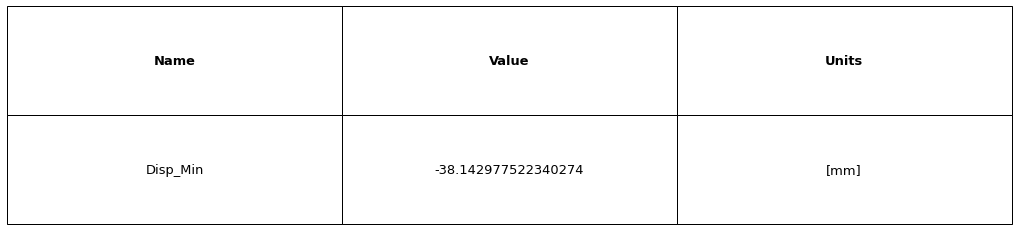

In [40]:
d = crit_controller.get_data()
col_labels = ["Name", "Value", "Units","Elform","IP"]
criteria_table =  []

for part_of in d.keys():
    for crit_type in d[part_of].keys():
        for criteria in d[part_of][crit_type].keys():
            criteria_table.append([criteria, d[part_of][crit_type][criteria]["Value"]])

units = ['[mm]','[mm]']
for criteria, unit in zip(criteria_table, units):
    criteria.append(unit)
 

fig6, ax = plt.subplots()

ax.axis('off')
bbox = [0, 0, 3, 1]
mpl_table = ax.table(cellText = criteria_table, bbox = bbox, colLabels = col_labels, cellLoc='center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(13)
mpl_table[0,0].get_text().set_weight('bold')
mpl_table[0,1].get_text().set_weight('bold')
mpl_table[0,2].get_text().set_weight('bold')           

In [49]:
#writes data from data_vis_controller to csv
data_vis_controller.write_CSV(output_dir)
path_to_text_out = os.path.join(output_dir, "criteria_table.csv")
crit_controller.write_CSV(output_dir, "criteria_table.csv")


[CALCULATION]	DATA VISUALIZATION writing csv to C:\FE_Simulations\Elemnt-type\01_Shell/3IP\Output
[CALCULATION]	DATA VISUALIZATION done writing csv to C:\FE_Simulations\Elemnt-type\01_Shell/3IP\Output\DATA VISUALIZATION_2021-01-18-21-36-50.csv
[CALCULATION]	CRITERIA writing csv to C:\FE_Simulations\Elemnt-type\01_Shell/3IP\Output
[CALCULATION]	CRITERIA done writing csv to C:\FE_Simulations\Elemnt-type\01_Shell/3IP\Output\criteria_table.csv
